In [9]:
# \\DISC
cwd = "..\\..\\"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Read .csv
df = pd.read_csv(cwd + "FLOX Final.csv")
df.head()

,Site,HI Total,Homo Test,Main ecosystem,FLOX Active,Reference network,Latitude,Longitude,Site name,Country,Link
0,KEN-KAP,0.000061,Yes,Savannah,Possible,FLOX,-1.6144,37.1338,Kapiti,Kenya,NaN
1,AT-Mmg,0.000151,Yes,Evergreen Forest,Yes,FLOX,47.3167,10.9703,Mieming,Austria,https://www.europe-fluxdata.eu/home/site-detai...
2,NED-ESSEN,0.000796,Yes,Evergreen Forest,No,FLOX,52.1665,5.7436,Essen,Netherlands,NaN
3,US ALASKA 1,0.001014,Yes,Tundra,Possible,FLOX,71.2800,-156.6092,US ALASKA 1,USA,NaN
4,KEN-1,0.001266,Yes,Crop,Not known,FLOX,-3.4262,38.1406,KEN - 1,Kenya,NaN


In [12]:
df_Group = df.groupby(['Main ecosystem','Homo Test']).count()
df_Group = df_Group.reset_index()
df_Group

,Main ecosystem,Homo Test,Site,HI Total,FLOX Active,Reference network,Latitude,Longitude,Site name,Country,Link
0,Crop,No,18,18,18,18,18,18,18,18,3
1,Crop,Yes,2,2,2,2,2,2,2,2,0
2,Deciduous Forest,No,6,6,6,6,6,6,6,6,3
3,Deciduous Forest,Yes,4,4,4,4,4,4,4,4,0
4,Evergreen Forest,No,3,3,3,3,3,3,3,3,1
5,Evergreen Forest,Yes,13,13,13,13,13,13,13,13,5
6,Grasslands,Yes,3,3,3,3,3,3,3,3,1
7,Savannah,No,1,1,1,1,1,1,1,1,0
8,Savannah,Yes,3,3,3,3,3,3,3,3,0
9,Tundra,No,1,1,1,1,1,1,1,1,0


In [13]:
list_Eco = list(df_Group['Main ecosystem'].unique())

In [14]:
# Get the counts of passed ecosystems
list_Value_Passed = []
for eco in list_Eco:
    temp_Array = df_Group[(df_Group['Homo Test'] == 'Yes') & (df_Group['Main ecosystem'] == eco)]['Site'].values
    if temp_Array.size:
        temp_Value = temp_Array[0]
        list_Value_Passed.append(temp_Value)
    else:
        list_Value_Passed.append(0)
list_Value_Passed

[2, 4, 13, 3, 3, 1, 0]

In [15]:
# Get the counts of failed ecosystems
list_Value_Failed = []
for eco in list_Eco:
    temp_Array = df_Group[(df_Group['Homo Test'] == 'No') & (df_Group['Main ecosystem'] == eco)]['Site'].values
    if temp_Array.size:
        temp_Value = temp_Array[0]
        list_Value_Failed.append(temp_Value)
    else:
        list_Value_Failed.append(0)
list_Value_Failed

[18, 6, 3, 0, 1, 1, 1]

Text(0, 0.5, 'Number of sites')

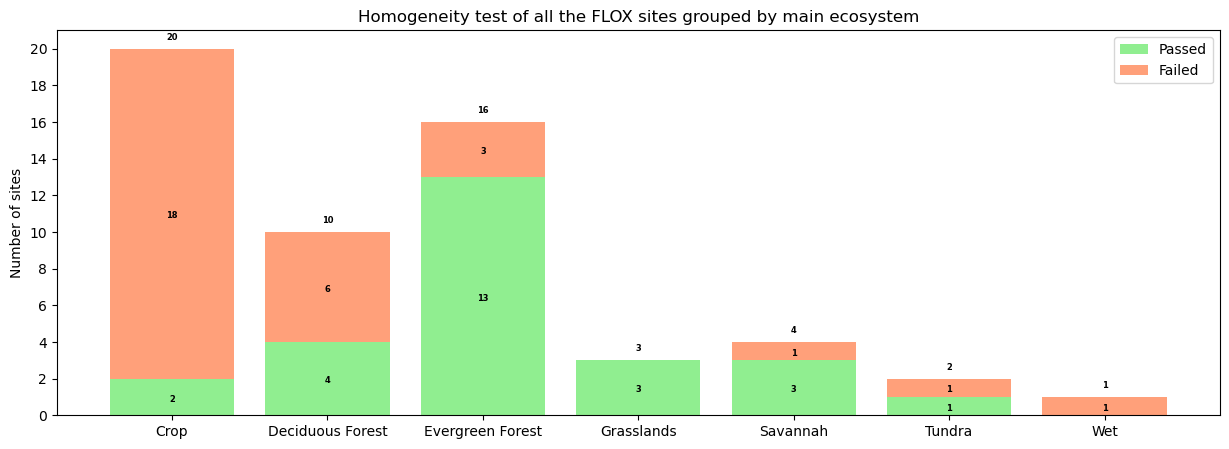

In [16]:
# Bar chart
groups = list_Eco
value_Passed = list_Value_Passed
value_Failed = list_Value_Failed
fig, ax = plt.subplots(figsize = (15,5))
plt.title("Homogeneity test of all the FLOX sites grouped by main ecosystem")
ax.bar(groups, value_Passed, label = 'Passed', color = 'lightgreen')
ax.bar(groups, value_Failed, bottom = value_Passed, label = 'Failed', color = 'lightsalmon')

i = 0
for bar in ax.patches:
  if bar.get_height() != 0:
    ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y() - 0.25,
          round(bar.get_height()), ha = 'center',
          color = 'black', weight = 'bold', size = 6)
  
  # Sum of values
total_values = np.add(value_Passed, value_Failed)
# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 0.5, round(total),
          ha = 'center', weight = 'bold', color = 'black', size = 6)

ax.legend()
ax.set_yticks([i for i in range(0,22,2)])
ax.set_ylabel('Number of sites')

In [17]:
[1,2,3] + [1,2,3]

[1, 2, 3, 1, 2, 3]